Used database with silica based compounds with BG greater than 0. Trained RF model to classify material.

In [1]:
import numpy as np 
import pandas as pd 
import csv
from sklearn.preprocessing import Imputer
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn.metrics import r2_score
import csv
from io import StringIO
#import missingno as msno
import io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('PDF')
#from StringIO import StringIO
from sklearn import cross_validation,linear_model, metrics, pipeline, preprocessing
from sklearn.preprocessing import FunctionTransformer
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler  
import calendar


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Import the file.

In [2]:
datamldb = pd.read_csv('initial_db.csv',sep=',')
print(datamldb.shape)

#SELECT DATABASE WITH SILICA ONLY
datamldb2=datamldb[datamldb['full_formula'].str.contains("Si")]
print(datamldb2.shape)
#Look into the format of the imported data

datamldb=datamldb2;
#datamldb=datamldb.dropna()



(69640, 64)
(4830, 64)


In [3]:
datamldb.drop(['Unnamed: 63','electrical_resistivity variance','electrical_resistivity mean','n_units_in_cell','density'],inplace=True,axis = 1)
#'Total row #1','Total row #2','Total row #3','Total row #4','Total row #5','Total row #6','Total row #7','Total row #8','Total row #9','atomic_mass mean','atomic_radius mean','X mean','valence_electrons mean'
#datamldb.drop(['Total 1s electrons','Total 2s electrons','Total 2p electrons','Total 3s electrons','Total 3p electrons','Total 4s electrons','Total 3d electrons','Total 4p electrons','Total 5s electrons','Total 4d electrons'],inplace=True,axis = 1)
#datamldb.drop(['Total 5p electrons','Total 6s electrons','Total 4f electrons','Total 5d electrons','Total 6p electrons','Total 7s electrons'],inplace=True,axis = 1)
#datamldb.drop(['Total 5f electrons','Total 6d electrons','Total 7p electrons'],inplace=True,axis = 1)
import matplotlib.pyplot as plt
#plt.plot(datamldb.isnull().sum())
#plt.show()

print(datamldb.isnull().sum())

cs=datamldb.size
csmissing=datamldb.isnull().sum(axis=0).sum()
#csmissing1=datamldb.isnan().sum(axis=0).sum()
print("Rows in cycle data ",len(datamldb))
print('percentmissing',csmissing)
#print('percentmissing',csmissing1)
print('fractionpercentmissing',(csmissing/cs))
print('original',datamldb.shape)
print(datamldb.head())
datamldb.loc[:, datamldb.isnull().any()]
datamldb=datamldb.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('original',datamldb.shape)

pretty_formula                0
full_formula                  0
atomic_mass variance          0
atomic_mass mean              0
atomic_radius variance        2
atomic_radius mean            2
X variance                    2
X mean                        0
valence_electrons variance    0
valence_electrons mean        0
Total group #1                0
Total group #2                0
Total group #3                0
Total group #4                0
Total group #5                0
Total group #6                0
Total group #7                0
Total group #8                0
Total group #9                0
Total group #10               0
Total group #11               0
Total group #12               0
Total group #13               0
Total group #14               0
Total group #15               0
Total group #16               0
Total group #17               0
Total group #18               0
Total row #1                  0
Total row #2                  0
Total row #3                  0
Total ro

In [4]:
datamldb.describe()

,atomic_mass variance,atomic_mass mean,atomic_radius variance,atomic_radius mean,X variance,X mean,valence_electrons variance,valence_electrons mean,Total group #1,Total group #2,...,Total 4f electrons,Total 5d electrons,Total 6p electrons,Total 7s electrons,Total 5f electrons,Total 6d electrons,Total 7p electrons,e_above_hull,symmetry_group,band_gap
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,...,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.0,4828.000000,4828.000000,4828.000000
mean,1382.683158,43.444127,0.134244,1.054113,0.579801,2.350780,3.041588,4.092390,3.277341,1.375104,...,3.161972,1.075394,0.236330,0.059238,0.080986,0.031897,0.0,0.078146,84.301367,1.915340
std,1900.168595,30.163224,0.101064,0.243665,0.403334,0.464840,5.343925,1.171865,8.660908,3.836132,...,6.000058,3.003436,1.082217,0.339102,0.567275,0.208126,0.0,0.183407,76.109587,1.942252
min,0.000000,4.016558,0.000000,0.344444,0.000000,1.090000,0.000000,1.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,124.980017,21.231927,0.060400,0.880000,0.140689,1.886000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,0.000000
50%,346.537126,29.219635,0.119381,0.965000,0.617078,2.541769,2.471821,4.428571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.013711,62.000000,1.501000
75%,2236.019058,60.182213,0.171510,1.300000,0.920082,2.720000,3.555556,4.800000,4.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076172,141.000000,3.440125
max,11673.395851,185.543058,0.930600,2.037500,2.046936,3.564000,61.187500,15.454545,120.000000,60.000000,...,28.000000,20.000000,6.000000,2.000000,6.000000,2.000000,0.0,2.443845,230.000000,7.717300


In [5]:
list(datamldb.columns.values)

['pretty_formula',
 'full_formula',
 'atomic_mass variance',
 'atomic_mass mean',
 'atomic_radius variance',
 'atomic_radius mean',
 'X variance',
 'X mean',
 'valence_electrons variance',
 'valence_electrons mean',
 'Total group #1',
 'Total group #2',
 'Total group #3',
 'Total group #4',
 'Total group #5',
 'Total group #6',
 'Total group #7',
 'Total group #8',
 'Total group #9',
 'Total group #10',
 'Total group #11',
 'Total group #12',
 'Total group #13',
 'Total group #14',
 'Total group #15',
 'Total group #16',
 'Total group #17',
 'Total group #18',
 'Total row #1',
 'Total row #2',
 'Total row #3',
 'Total row #4',
 'Total row #5',
 'Total row #6',
 'Total row #7',
 'Total row #8',
 'Total row #9',
 'Total 1s electrons',
 'Total 2s electrons',
 'Total 2p electrons',
 'Total 3s electrons',
 'Total 3p electrons',
 'Total 4s electrons',
 'Total 3d electrons',
 'Total 4p electrons',
 'Total 5s electrons',
 'Total 4d electrons',
 'Total 5p electrons',
 'Total 6s electrons',
 'To

In [6]:
# Drop by Name
X2= datamldb.drop(['band_gap','e_above_hull','pretty_formula','full_formula'], axis=1)
#X2 = datamldb[['atomic_mass variance', 'atomic_radius variance',]]
# Select the ones you want
y2 = datamldb[['band_gap', 'e_above_hull']]
# Convert to matrices 
X2 = np.matrix(X2.values)
y2 = np.array(y2.values)
print(datamldb.shape, X2.shape, y2.shape)

(4828, 59) (4828, 55) (4828, 2)


In [7]:
#print(y2[:10,0],y2[:10,1])

In [8]:
#print(datamldb.drop(['band_gap','e_above_hull'], axis=1).columns.values)

In [9]:
S300099=datamldb.drop(['band_gap','e_above_hull','pretty_formula','full_formula'], axis=1).copy()
print(S300099['symmetry_group'])

S300099_symmetry = pd.get_dummies(S300099['symmetry_group'])
S300099new=S300099.drop(['symmetry_group'], axis=1).copy()
S300099new = pd.concat([S300099new,S300099_symmetry], axis=1)

print('new',S300099new.shape,'old',S300099.shape)

#categorical_data_columns = ['symmetry_group'] 
#categorical_data_indices = np.array([(column in categorical_data_columns) for column in S300099.columns], dtype = bool)
##S300099.drop(categorical_data_columns,inplace=True, axis = 1)
#print('categoricaldata',categorical_data_indices)
##print(datamldb.drop(['band_gap','e_above_hull','symmetry_group'], axis=1).columns.values)
##numeric_data_columns = [' atomic_mass variance',' electrical_resistivity variance',' atomic_radius variance','WINDSPEED','DTC','xHOUR','yHOUR']
#numeric_data_columns=datamldb.drop(['band_gap','e_above_hull','symmetry_group'], axis=1).columns.values
numeric_data_columns=S300099new.columns.values
##print('after', S300099.shape)


##numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in S300099new.columns], dtype = bool)
#print('numericdata',numeric_data_indices)
#['xHOUR','yHOUR','xdirection','ydirection','TempC','Pptmm','Humidpercen','AVGSPEED']

transformer_list = [        
            #binary
            #('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
 #         ('categorical_variables_processing', pipeline.Pipeline(steps = [
  #              ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
   #             ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
    #                 ])),
        ]

5        124
11       164
26        71
28        63
32       221
44        63
107      225
124       62
135      221
225       15
227      225
235        1
306      225
316      225
336      225
342      225
348      156
390      216
391      139
456       63
479      122
481      122
570      225
578      216
590      216
599      139
600      107
601      225
630      221
661      140
        ... 
69091    130
69092    130
69094    130
69114    130
69236     12
69238     12
69242      2
69243     12
69247      2
69248      1
69260     12
69326     12
69360     12
69387     12
69390     12
69394     12
69409     12
69411      2
69415      2
69425     12
69427     12
69439     12
69441     12
69443     12
69471      1
69473     12
69510     12
69531     12
69533     12
69537     12
Name: symmetry_group, Length: 4828, dtype: int64
new (4828, 243) old (4828, 55)


SPLIT TRAINING AND TEST DATA NEXT

In [10]:
#S300099.reindex(np.random.permutation(S300099.index))
#S300099['HOUR']=S3000991['HOUR']
from sklearn import preprocessing
S300099new_scaled = preprocessing.scale(S300099new)
#print(S300099new_scaled.mean(axis=0))
#print(S300099new_scaled.std(axis=0))

y1c=[1 if 0<value else 0 for value in y2[:,0]]
print(len(y1c))
print(y1c.count(1))
print('percent of class 1', y1c.count(1)/len(y1c)*100)

X_train, X_test, y_train, y_test = train_test_split(S300099new_scaled,y1c,test_size=0.2,stratify=y1c,random_state = 2)

#X_train=X_train[:500,:]
#y_train=y_train[:500]

y_t=y_train
#.ravel()

#X_test=X_test[:100,:]
#y_test=y_test[:100]
#X_test=X_test.head(500)

y_test0=y_test
#.ravel()
#y_test0=y_test[:500]

#y_test1=y_test[:,1].ravel()
#y_test1=y_test1[:500]



4828
3300
percent of class 1 68.35128417564209


In [11]:
#print(X_train.shape)
#print(y_train)
#y1c1=[1 if 0.25<=value<=0.5 else 0 for value in y_train]
#print(len(y_train))
#print(y_train.count(1))

#print(len(y_test))
#print(y_test.count(1))

In [12]:
def scoring(clf,score):
    scores = cross_val_score(clf, X_train, y_t, cv=3, n_jobs=5,scoring=score)
    print (np.median(scores))
    return np.median(scores)

In [13]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train,y_test):
    #print (estimator,tuned_parameters,cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The R2 scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(r2_score(y_true, y_pred))
    print()
    return clf

In [14]:
def plot_learning_curve(estimator,outfile,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)

In [15]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

In [16]:
# function takes a model parameter and a ranger and produces a plot and dataframe of CV scores for the parameter values
def evaluate_param(parameter, num_range, index,clf,y_train):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(X_train, y_train) #features
    
    df = {}
#    grid_search.cv
#    for i, score in enumerate(grid_search.grid_scores_):
#        df[score[0][parameter]] = score[1]
 
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    print('means',means,num_range)
#from operator import itemgetter
#paramvalues=map(itemgetter(1),grid_search.cv_results_['params'])
#print('paramvalues',paramvalues)
#grid_search.cv_results_['params'].values()))
    
#    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    plt.subplot(2,2,index)
    plot = plt.plot(num_range,means)
    plt.title(parameter)
    return plot
#    df = pd.DataFrame.from_dict(df, orient='index')
#    df.reset_index(level=0, inplace=True)
#    df = df.sort_values(by='index')
 

#ESTIMATE ONE PARAMETER AT A TIME
rfr1 = RandomForestClassifier(n_estimators = 100,
                            min_samples_leaf = 1, #max_leaf_nodes=50, #max_depth=20,
                            random_state = 2)
param_gridrf = {"n_estimators": np.arange(70,110,20),
#             "max_depth": np.arange(1,20,2),
#              "min_samples_split": np.arange(1,15,3),
#              "min_samples_leaf": np.arange(1,30,6),
#              "max_leaf_nodes": np.arange(90,151,30),
#             "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)
               }
features = S300099new.columns
print('feature',features)
#y_t=y_train[:,0].ravel()
#print('trainsize',X_train.shape)
#print('trainsize',y_t.shape)
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_gridrf):   
    evaluate_param(parameter, param_range, index,rfr1,y_t)
    index += 1
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt.savefig('randomforestparavarclass2silica.pdf',bbox_inches='tight')  

rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 4, max_leaf_nodes=50,max_depth=15,
                            random_state = 2)
#scoring(rfr)    


gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
#scoring(gbr)

dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)



print ('yt',np.max(y_t))
#print ('yt',y_t.dtype.char == 'S') 

#checking for sensitivity of parameters


estimatorrfr = pipeline.Pipeline(steps = [       
   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', rfr)
    ])
param_grid = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#'n_estimators': [50,100,10]
}
   
    
#grid_cv=hypertune(estimatorrfr,param_grid,3,X_train,y_t,y_test)
#print (grid_cv.best_estimator_)
clf=GridSearchCV(estimatorrfr,param_grid,3)



print('gridcv', clf)
##,scoring    
clf.fit(X_train,y_train)
##grid_cv.fit(X_train,y_train)
#predicted = clf.best_estimator_.predict(X_test)
##print('gridcv', grid_cv)
print('importance',estimatorrfr.named_steps["model_fitting"].feature_importances_)




title = "Fit measured Vs predicted"
out_file1=('RFFitPrediction.pdf')
plot_measured_prediction(title,y_test0,predicted,out_file1)

#y_test=y_test[:,1].ravel()
print ("Random Forest error in bar:", median_absolute_error(y_test0,predicted))

print(estimatorrfr.named_steps["model_fitting"])
#print(X_train.shape)
def plot_importances(model, model_name):
#    print(grid_search.best_estimator_.named_steps["clf"].feature_importances_)
    clf = GridSearchCV(model,{},3)
#,scoring    
    clf.fit(X_train,y_train)
    importances=model.named_steps["model_fitting"].feature_importances_
#    print('importance',importances)
# importances = model.feature_importances_
#   std = np.std([model.feature_importances_ for feature in model.estimators_],
    std = np.std([model.named_steps["model_fitting"].feature_importances_ for feature in model.named_steps["model_fitting"].estimators_],axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (12,5))
    plt.title("Feature importances of " + model_name)
    #del X_train['HOUR']
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    #print( X_train.columns[indices])
    plt.xticks(range(X_train.shape[1]),X_train.columns[indices])
    plt.xlim([-1, X_train.shape[1]])
    plt.savefig('importance.pdf',bbox_inches='tight')
    plt.show()
#print(estimatorrfr.named_steps["feature_processing"])  
print("Feature ranking:")

i = 0
for feature in X_train:
    print (i, feature)
    i += 1
    
plot_importances(estimatorrfr, "Random Forest Regressor")

In [17]:
rfr = RandomForestClassifier(n_estimators =100,
                            min_samples_leaf =1, # max_leaf_nodes=50,
                            random_state = 2)
#print("yt",y_t.shape)
rfr = rfr.fit(X_train, y_t)
importances = rfr.feature_importances_
rfrpred=rfr.predict(X_test)


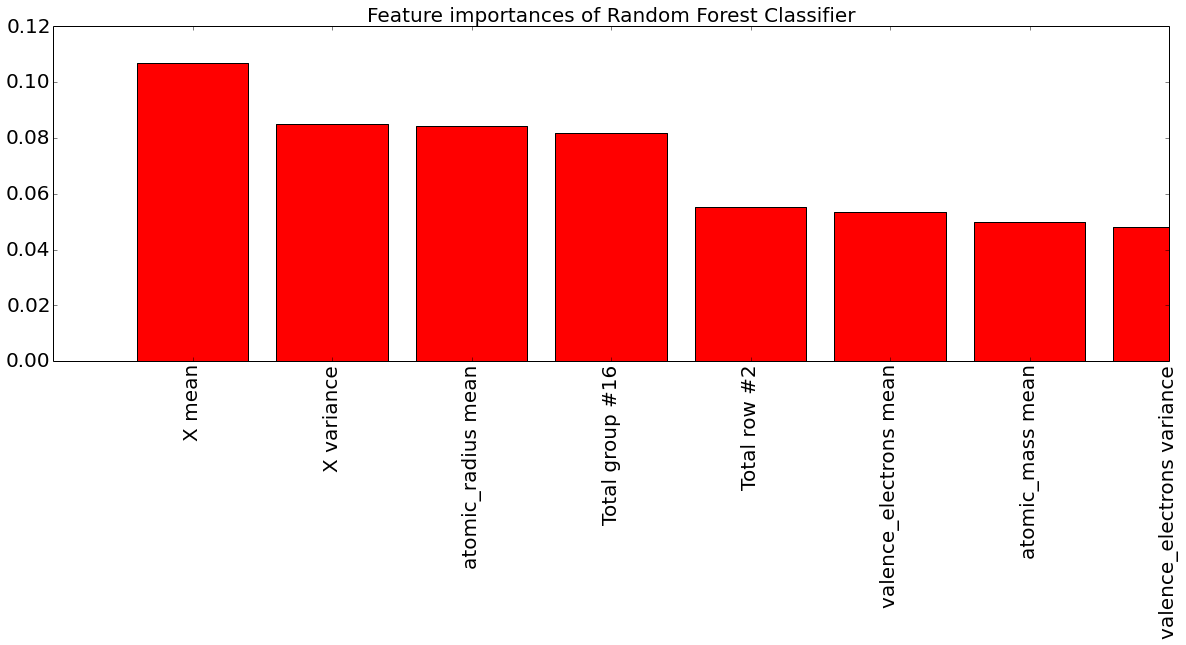

In [18]:
#print(X_train.shape)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24

def plot_importances2(model, model_name): 
    importances = model.fit(X_train, y_t).feature_importances_
    #importances = model.feature_importances_
    
    std = np.std([model.feature_importances_ for feature in model.estimators_])
    indices = np.argsort(importances)[::-1]  
    #print('indices'  ,' Name of column' 'Indice number of importance')
    #print(indices.T,X_train.columns[indices].T,importances[indices].T)
    plt.figure(figsize = (20,6))
    plt.title("Feature importances of " + model_name)
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]),S300099new.columns[indices])
    plt.xticks(rotation=90)
    #plt.xticks(range(X_train.shape[1]),indices)
    #plt.xlim([-1, X_train.shape[1]])
    plt.xlim([-1,7])
    plt.savefig('importanceclass1silica.pdf',bbox_inches='tight')
    plt.show()
    return indices
#print(estimatorrfr.named_steps["feature_processing"])  
#print("Feature ranking:")

i = 0
for feature in X_train:
    #print (i, feature)
    i += 1
    
index=plot_importances2(rfr, "Random Forest Classifier")

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


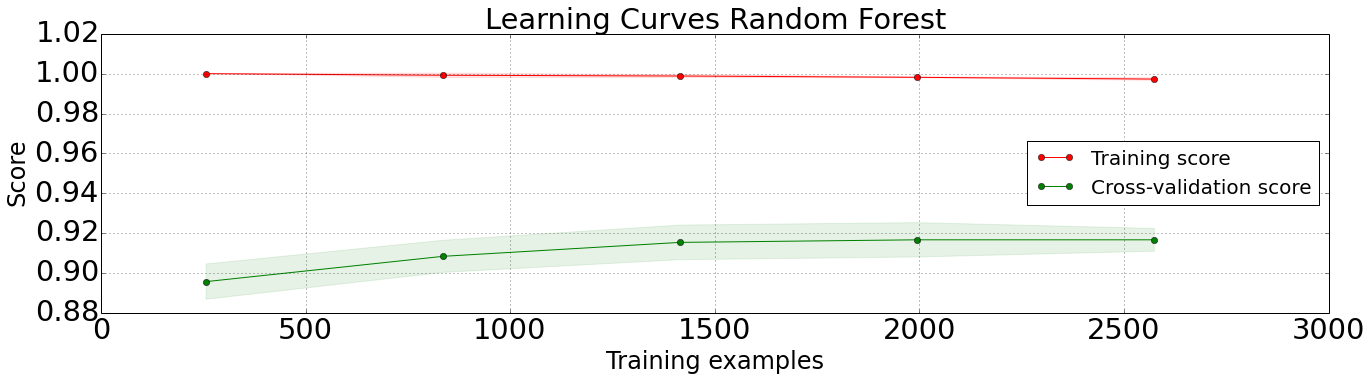

In [19]:
title = "Learning Curves Random Forest"
out_file1=('RFFitLC.pdf')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(rfr,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
RFTS=train_sizes
RFTSco=train_scores
RFTeSco=test_scores

In [20]:
scoring(rfr,'accuracy')

0.916860916861


0.91686091686091686

In [21]:
scoring(rfr,'precision')
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. tp/(tp+fp)

0.93401592719


0.9340159271899886

In [22]:
scoring(rfr,'f1')

0.939582156973


0.93958215697346126

In [23]:
scoring(rfr,'recall')
#Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. The recall is intuitively the ability of the classifier to find all the positive samples. it gives info on how lower is false negative. 
#recall = TP / (TP + FN)
#precision = TP / (TP + FP)

0.945454545455


0.94545454545454544

In [3]:
tn, fp, fn, tp = confusion_matrix(y_test,rfrpred).ravel()
print(tn,fp,fn,tp)
plt.figure()
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,rfrpred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test,rfrpred,pos_label=1)
print(precision, recall, threshold)
#plt.step(recall, precision, color='b', alpha=0.1,where='post')
#plt.fill_between(recall, precision,step='post',alpha=0.2,color='b')

#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

#ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
#The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
from sklearn.metrics import roc_auc_score
area_under_curve=roc_auc_score(y_test,rfrpred)
print("roc",area_under_curve)

NameError: name 'y_test' is not defined

In [25]:
def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    #plt.figure(figsize=(16,6))
    ax=sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.title(title, fontsize=25)
    #plt.show()
    #ax.set(ylim=(1.5,3))
    plt.savefig(out_file,bbox_inches='tight')
    #plt.show()
    return ax

sns.set(font_scale=2.1)
ax=sns.heatmap(corrMatt, vmax=1, square=True,center=0,linewidths=.5,cmap="YlGnBu")
for label in ax.get_yticklabels():
        label.set_weight("bold")
for label in ax.get_xticklabels():
        label.set_weight("bold")
        
fig.savefig('cycleCorrelations.pdf',bbox_inches='tight')

In [26]:
datamldb.head()

,pretty_formula,full_formula,atomic_mass variance,atomic_mass mean,atomic_radius variance,atomic_radius mean,X variance,X mean,valence_electrons variance,valence_electrons mean,...,Total 4f electrons,Total 5d electrons,Total 6p electrons,Total 7s electrons,Total 5f electrons,Total 6d electrons,Total 7p electrons,e_above_hull,symmetry_group,band_gap
5,Nb4CoSi,Nb8Co2Si2,621.535428,76.440703,0.016458,1.375,0.018722,1.696667,1.222222,1.666667,...,0,0,0,0,0,0,0,0.004669,124,0.0
11,Al(CoSi)2,Al1Co2Si2,234.023012,40.203786,0.012600,1.230,0.012624,1.834000,0.800000,3.000000,...,0,0,0,0,0,0,0,0.000000,164,0.0
26,Si(CO)2,Si2C4O4,34.903397,16.821140,0.034400,0.740,0.350264,2.776000,0.960000,4.800000,...,0,0,0,0,0,0,0,1.492854,71,0.0
28,Si,Si4,0.000000,28.085500,0.000000,1.100,0.000000,1.900000,0.000000,4.000000,...,0,0,0,0,0,0,0,0.476623,63,0.0
32,SiOs,Si1Os1,6572.709720,109.157750,0.010000,1.200,0.022500,2.050000,1.000000,3.000000,...,14,6,0,0,0,0,0,0.040743,221,0.0


[ 5  4  3 23 27  7  1  6  2  0 35 36]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


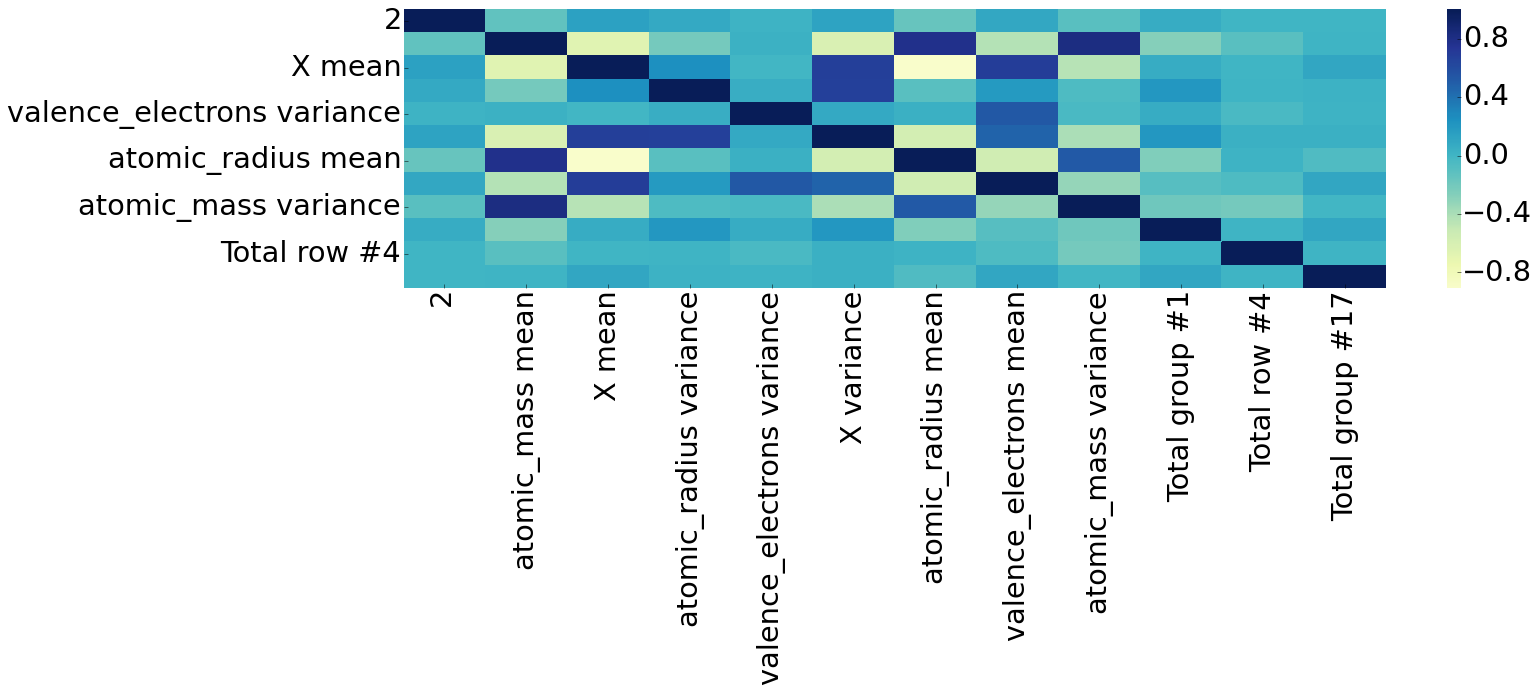

In [27]:
datamldb = datamldb.reset_index (drop = True)
print(index[:12])
datamldb1=S300099new.iloc[:,[55,1,5,2,6,4,3,7,0,8,29,24]]
#pdcorr=S300099new.iloc[:1000,index[:6]]
#print('shape' , pdcorr.shape)
#corrMatt=datamldb.corr
#print(corrMatt)
corrMatt = datamldb1.corr()
#corrMatt = S300099new_scaled[:,index[1:numbers]].corr
#mask = np.array(corrMatt)
#mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
#fig.set_size_inches(20,10)
#plt.matshow(corrMatt)
#sns.set(font_scale=2.1)
#import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.heatmap(corrMatt,center=0,vmax=1,cmap="YlGnBu")
#for label in ax.get_yticklabels():
#        label.set_weight("bold")
#for label in ax.get_xticklabels():
#        label.set_weight("bold")
fig.savefig('CorrelationsSilica.pdf',bbox_inches='tight')
#violinplot(datamldb,'X variance','Band_gap','X variance','Band Gap','Band Gap vs Electronegativity','VarianceElectronegativityinf.pdf')

In [28]:
datamldb['ylc'] = y1c
#[:1000]

In [29]:
datamldb = datamldb.head(1000)

In [30]:
list(datamldb.columns.values)

['pretty_formula',
 'full_formula',
 'atomic_mass variance',
 'atomic_mass mean',
 'atomic_radius variance',
 'atomic_radius mean',
 'X variance',
 'X mean',
 'valence_electrons variance',
 'valence_electrons mean',
 'Total group #1',
 'Total group #2',
 'Total group #3',
 'Total group #4',
 'Total group #5',
 'Total group #6',
 'Total group #7',
 'Total group #8',
 'Total group #9',
 'Total group #10',
 'Total group #11',
 'Total group #12',
 'Total group #13',
 'Total group #14',
 'Total group #15',
 'Total group #16',
 'Total group #17',
 'Total group #18',
 'Total row #1',
 'Total row #2',
 'Total row #3',
 'Total row #4',
 'Total row #5',
 'Total row #6',
 'Total row #7',
 'Total row #8',
 'Total row #9',
 'Total 1s electrons',
 'Total 2s electrons',
 'Total 2p electrons',
 'Total 3s electrons',
 'Total 3p electrons',
 'Total 4s electrons',
 'Total 3d electrons',
 'Total 4p electrons',
 'Total 5s electrons',
 'Total 4d electrons',
 'Total 5p electrons',
 'Total 6s electrons',
 'To

#print(S300099new.columns[index[:15]])
f, ax = plt.subplots(2,3)
for numbers in range(0,5):
    #plt.figure()
    #plt.boxplot(S300099new_scaled[:,index[numbers]])
    #S300099new.iloc[:,index[numbers]].plot.box()
    #print(numbers)

f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(1,8))
violinplot(datamldb,'ylc','density','Band Gap','Density','Band Gap vs Density','DensityinfSi.pdf')

den = pd.DataFrame(datamldb.groupby("ylc")["density"].describe())
print('density statistics')
print(den)

datamldb.plot.scatter(x='density', y='band_gap');
plt.xlim(0.5,10)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


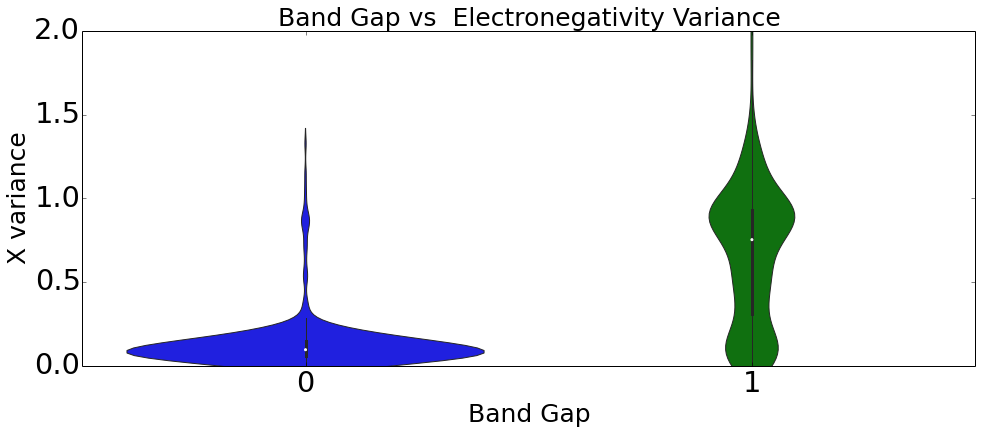

In [33]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,2))
violinplot(datamldb,'ylc','X variance','Band Gap','X variance','Band Gap vs  Electronegativity Variance','VarianceElectroNeginfSi.pdf')

In [34]:
envar = pd.DataFrame(datamldb.groupby("ylc")["X variance"].describe())
print('Electronegativity Variance statistics')
print(envar)

Electronegativity Variance statistics
     count      mean       std  min       25%      50%       75%       max
ylc                                                                       
0    499.0  0.128330  0.158767  0.0  0.057304  0.09610  0.147486  1.326613
1    501.0  0.666072  0.409871  0.0  0.307413  0.75349  0.933450  2.046936


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


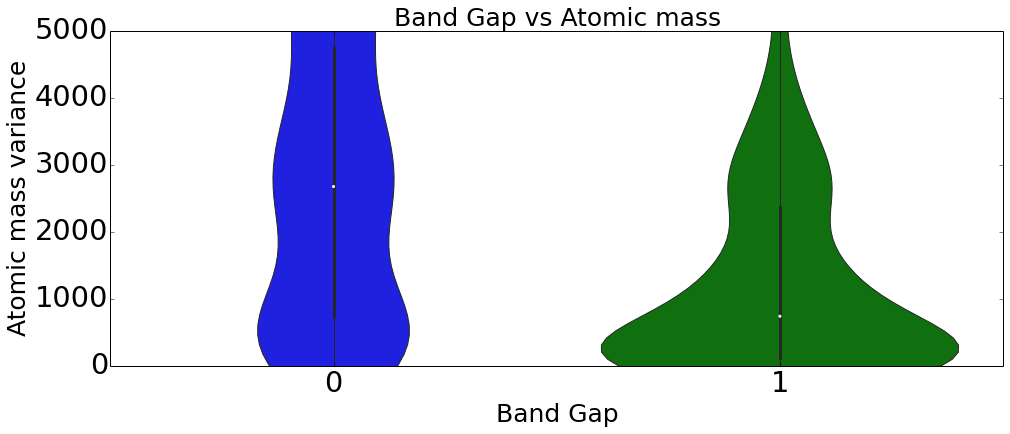

In [35]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,5000))
violinplot(datamldb,'ylc','atomic_mass variance','Band Gap','Atomic mass variance','Band Gap vs Atomic mass','VarianceatomicmassinfSi.pdf')

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


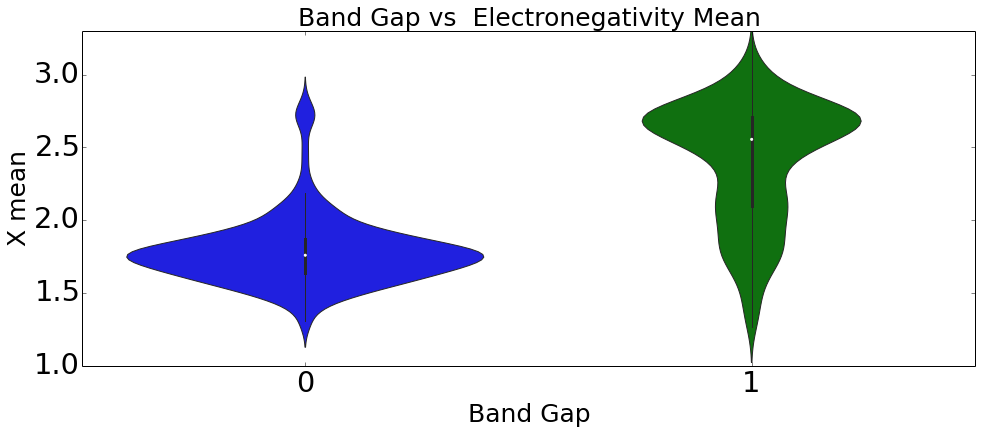

In [36]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(1,3.3))
violinplot(datamldb,'ylc','X mean','Band Gap','X mean','Band Gap vs  Electronegativity Mean','MeanElectroNeginfSi.pdf')

In [37]:
enmean = pd.DataFrame(datamldb.groupby("ylc")["X mean"].describe())
print('Electronegativity Mean statistics')
print(enmean)

Electronegativity Mean statistics
     count      mean       std       min       25%       50%       75%    max
ylc                                                                          
0    499.0  1.784379  0.240842  1.266667  1.640000  1.759565  1.870333  2.844
1    501.0  2.411894  0.416380  1.263333  2.099167  2.555714  2.708571  3.564


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


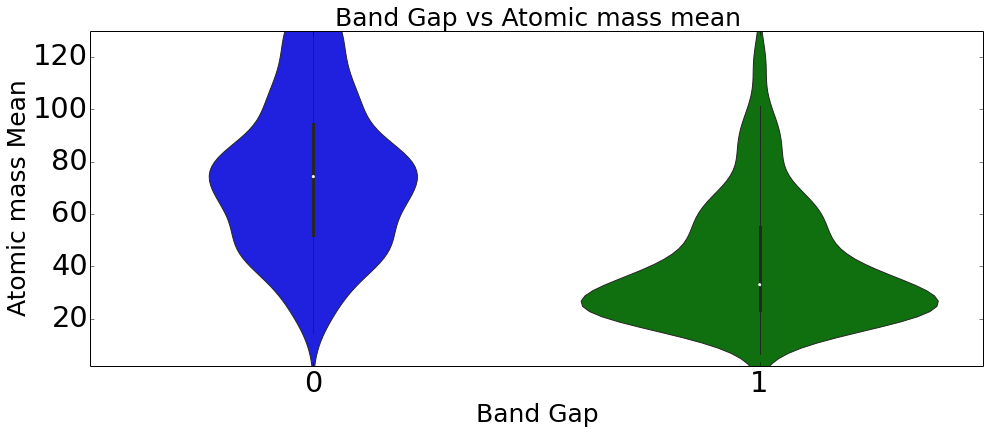

In [38]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,130))
violinplot(datamldb,'ylc','atomic_mass mean','Band Gap','Atomic mass Mean','Band Gap vs Atomic mass mean','MeanatomicmassinfSi.pdf')

In [39]:
amm = pd.DataFrame(datamldb.groupby("ylc")["atomic_mass mean"].describe())
print(amm)

     count       mean        std        min        25%        50%        75%  \
ylc                                                                            
0    499.0  75.337117  29.900491  14.556769  51.820553  74.339250  94.279019   
1    501.0  42.609139  27.186403   6.423452  23.277659  32.990291  54.909554   

            max  
ylc              
0    154.051546  
1    172.957929  


datamldb.plot.scatter(x='atomic_mass mean', y='band_gap');

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


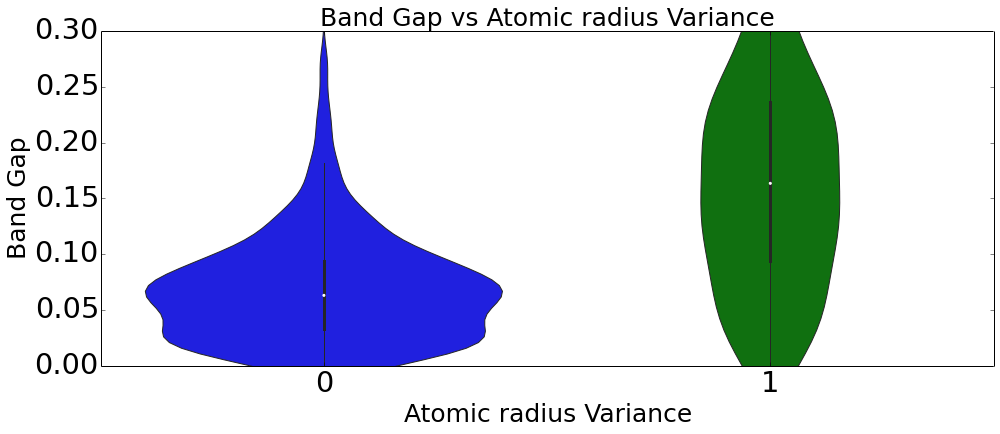

In [40]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,0.3))
violinplot(datamldb,'ylc','atomic_radius variance','Atomic radius Variance','Band Gap','Band Gap vs Atomic radius Variance','Varianceatomicradiusinf.pdf')

In [41]:
arv = pd.DataFrame(datamldb.groupby("ylc")["atomic_radius variance"].describe())
print("atomic radius variance difference")
print(arv)

atomic radius variance difference
     count      mean       std  min       25%       50%       75%       max
ylc                                                                        
0    499.0  0.070098  0.052410  0.0  0.033101  0.063125  0.093889  0.445148
1    501.0  0.177411  0.124167  0.0  0.093750  0.163500  0.236024  0.882222


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


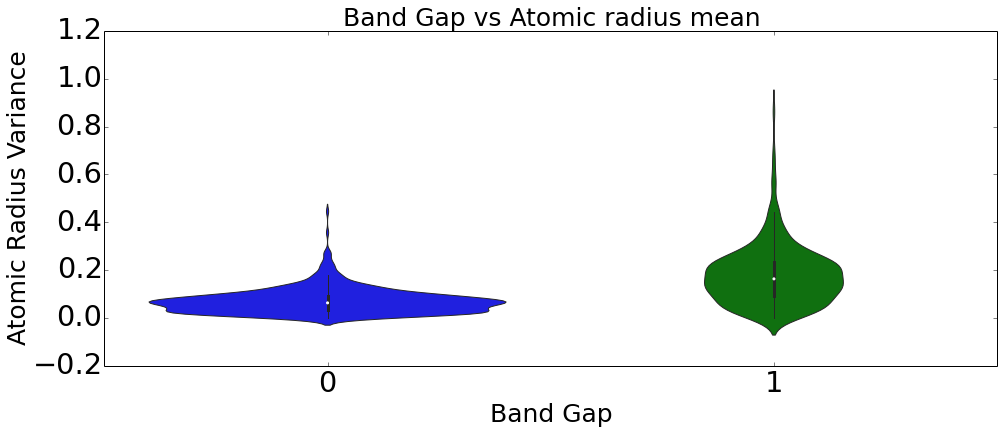

In [42]:
f,ax=plt.subplots(figsize=(16,6))
#ax.set(ylim=(0,0.3))
violinplot(datamldb,'ylc','atomic_radius variance','Band Gap','Atomic Radius Variance','Band Gap vs Atomic radius mean','Mean_atomicmassinf.pdf')

In [43]:
arm = pd.DataFrame(datamldb.groupby("ylc")["atomic_radius mean"].describe())
print("atomic radius mean difference")
print(arm)

atomic radius mean difference
     count      mean       std   min     25%       50%  75%   max
ylc                                                              
0    499.0  1.323272  0.120128  0.74  1.2875  1.330000  1.4  1.70
1    501.0  1.046823  0.218457  0.42  0.8950  0.977273  1.2  1.85


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


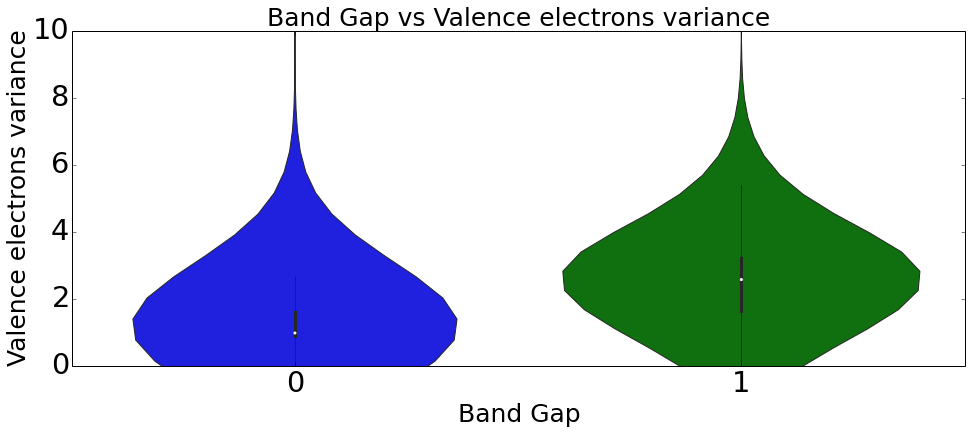

In [44]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,10))
violinplot(datamldb,'ylc','valence_electrons variance','Band Gap','Valence electrons variance','Band Gap vs Valence electrons variance','Variance_ValenceElectroninfSi.pdf')

In [45]:
vev = pd.DataFrame(datamldb.groupby("ylc")["valence_electrons variance"].describe())
print("valence_electrons variance difference")
print(vev)

valence_electrons variance difference
     count      mean       std  min       25%       50%       75%        max
ylc                                                                         
0    499.0  2.081212  6.279677  0.0  0.888889  0.979592  1.614404  54.888889
1    501.0  2.967091  4.063389  0.0  1.640000  2.576389  3.210000  52.160000


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


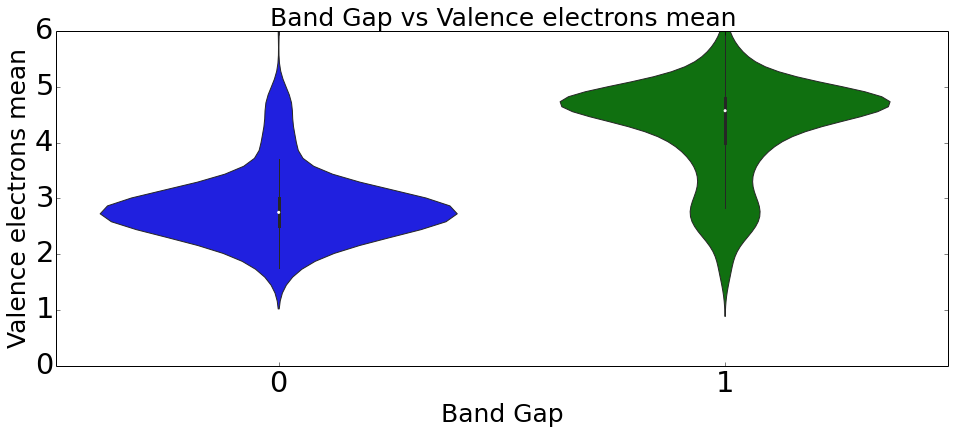

In [46]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,6))
violinplot(datamldb,'ylc','valence_electrons mean','Band Gap','Valence electrons mean','Band Gap vs Valence electrons mean','Mean_ValenceElectroninfSi.pdf')

In [47]:
vem = pd.DataFrame(datamldb.groupby("ylc")["valence_electrons mean"].describe())
print("valence_electrons mean difference")
print(vem)

valence_electrons mean difference
     count      mean       std       min  25%       50%  75%   max
ylc                                                               
0    499.0  2.946781  1.005522  1.600000  2.5  2.750000  3.0  14.5
1    501.0  4.279409  0.944007  1.428571  4.0  4.571429  4.8   9.2


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


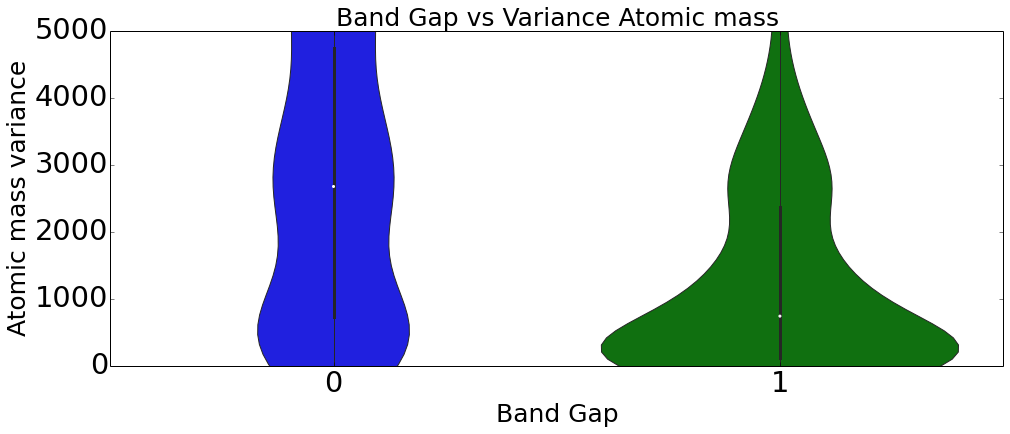

In [48]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,5000))
ax=violinplot(datamldb,'ylc','atomic_mass variance','Band Gap', 'Atomic mass variance','Band Gap vs Variance Atomic mass','VarianceAtomicmassinfSi.pdf')
plt.show()

In [49]:
amv = pd.DataFrame(datamldb.groupby("ylc")["atomic_mass variance"].describe())
print("atomic_mass variance")
print(amv)

atomic_mass variance
     count         mean          std  min         25%          50%  \
ylc                                                                  
0    499.0  2997.578284  2502.749869  0.0  726.043280  2677.968901   
1    501.0  1405.624387  1665.691165  0.0  118.597151   741.963916   

             75%           max  
ylc                             
0    4747.347722  11654.767828  
1    2365.790626   8570.796126  


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


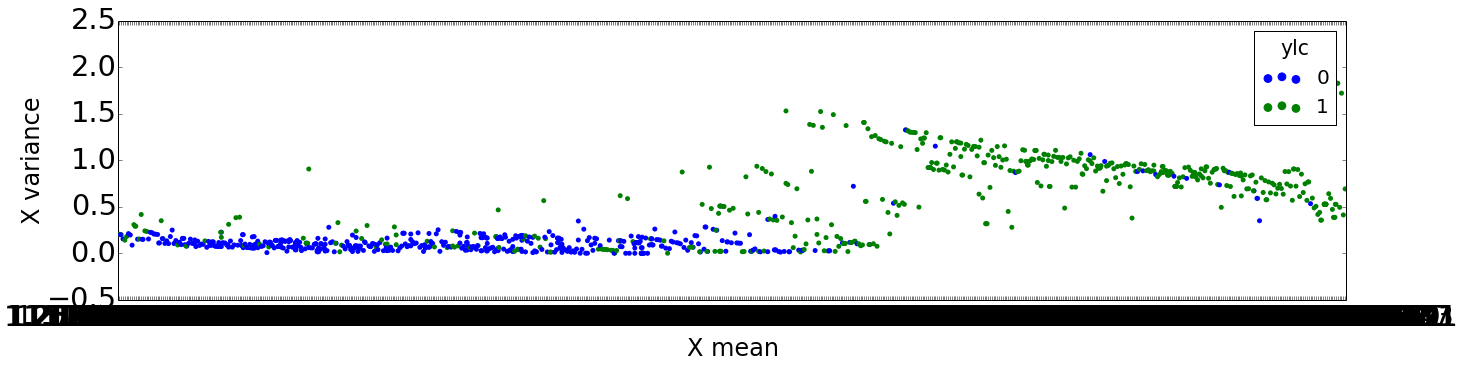

In [53]:
g=sns.swarmplot(x='X mean',y='X variance',hue='ylc',data=datamldb)
#xlabel=''
#ylabel=''
#title=''
#plt.xlabel(xlabel, fontsize=25)
#    plt.ylabel(ylabel, fontsize=25)
#    plt.title(title, fontsize=25)
    #plt.show()
    #ax.set(ylim=(1.5,3))
plt.savefig("classificationmap",bbox_inches='tight')
#g.set(xlabel="Hour within a Day", ylabel="Number of Cars on Road")

datamldb.plot.scatter(x='atomic_mass variance', y='band_gap');
plt.xlim(0,8000)

confusion_matrix()

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py
cmap = plt.cm.RdYlBu
https://github.com/scikit-learn-contrib/imbalanced-learn

h= 0.02  # fine step width for decision surface contours
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
f, ax = plt.subplots()
    # Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_t, edgecolors='k')
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

#if hasattr(rfr, "decision_function"):

#Z = rfr.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
#cs = plt.contourf(xx, yy, Z, cmap=cmap)
        
#Z = rfr.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
classi=rfr.fit(X_train, y_train)
score = rfr.score(X_test, y_test)
Z = classi.predict_proba(X_test)

        # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
#if ds_cnt == 0:
#    ax.set_title(name)
#    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
#    i += 1

plt.tight_layout()
plt.show()

estimator2 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
    ('model_fitting', gbr)
    ] )

#estimator2 = make_pipeline (pipeline.FeatureUnion(transformer_list=transformer_list),
#                           FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
#                           ('model_fitting', gbr))

param_grid2 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'n_estimators': [50,100,10]
}

grid_cv2=hypertune(estimator2,param_grid2,3,X_train,y_t,y_test0)


predicted2 = grid_cv2.best_estimator_.predict(X_test)

title = "Learning Curves GB"
out_file1=('GBFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv2.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
GBTS=train_sizes
GBTSco=train_scores
GBTeSco=test_scores

title = "Fit measured Vs predicted"
out_file1=('GB.pdf')
plot_measured_prediction(title,y_test0,predicted2,out_file1)

estimator3 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', dtr)
    ] )
param_grid3 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'max_depth': [6,7,8]
}

grid_cv3=hypertune(estimator3,param_grid3,3,X_train,y_t,y_test0)

predicted3 = grid_cv3.best_estimator_.predict(X_test)


title = "Learning Curves DT"
out_file1=('DTFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv3.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
DTTS=train_sizes
DTTSco=train_scores
DTTeSco=test_scores
title = "Fit measured Vs predicted"
out_file1=('DT.pdf')
plot_measured_prediction(title,y_test0,predicted3,out_file1)

finalpredicted = 0.33*predicted + 0.33*predicted2 + 0.33*predicted3
title = "Fit measured Vs predicted"
out_file1=('Ensemble.pdf')
plot_measured_prediction(title,y_test0,finalpredicted,out_file1)

final_train_score=(RFTSco*0.333)+(GBTSco*0.333)+(DTTSco*0.333)
final_test_score=(RFTeSco*0.333)+(GBTeSco*0.333)+(DTTeSco*0.333)
title = "Learning Curves Ensemble"
outfile=('EFitLC.pdf')
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(final_train_score, axis=1)
train_scores_std = np.std(final_train_score, axis=1)
test_scores_mean = np.mean(final_test_score, axis=1)
test_scores_std = np.std(final_test_score, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.savefig(outfile,bbox_inches='tight')


print ("RF error of trip count:", median_absolute_error(y_test0,predicted))
print ("GBR Daily error of trip count:", median_absolute_error(y_test0,predicted2))
print ("DT Daily error of trip count:", median_absolute_error(y_test0,predicted3))
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test0,finalpredicted))